In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn
%matplotlib inline

In [8]:
df = pd.read_excel('datitos.xlsx')

In [9]:
df.head()

Edad  Estatura Sexo  #Zapato
0    31       184    H     30.0
1    21       171    H     27.0
2    22       185    H     29.0
3    28       185    H     29.0
4    23       164    M     25.5

In [10]:
df.describe()

Edad    Estatura    #Zapato
count  67.000000   67.000000  67.000000
mean   21.880597  167.611940  25.925373
std     1.710240    9.045265   1.989087
min    20.000000  150.000000  23.000000
25%    21.000000  159.500000  24.000000
50%    21.000000  169.000000  26.000000
75%    22.000000  174.000000  27.500000
max    31.000000  185.000000  30.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad582ea090>,
      dtype=object)

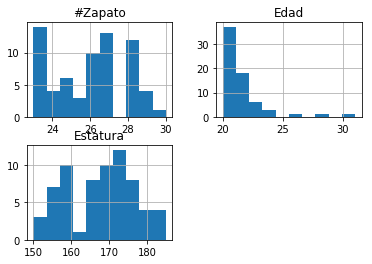

In [11]:
df.hist()

In [12]:
df.Sexo.value_counts(normalize=True)

H    0.597015
M    0.402985
Name: Sexo, dtype: float64

In [13]:
df.groupby('Sexo').mean()

Edad    Estatura    #Zapato
Sexo                                  
H     22.100000  173.525000  27.325000
M     21.555556  158.851852  23.851852

In [14]:
df.corr()

Edad  Estatura   #Zapato
Edad      1.000000  0.303524  0.289075
Estatura  0.303524  1.000000  0.881343
#Zapato   0.289075  0.881343  1.000000

In [50]:
X = df[['Edad','Estatura','#Zapato']].copy()

In [16]:
sc = MinMaxScaler()

In [17]:
sc.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)

In [19]:
Xs.describe()

Estatura    #Zapato
count  67.000000  67.000000
mean    0.503198   0.417910
std     0.258436   0.284155
min     0.000000   0.000000
25%     0.271429   0.142857
50%     0.542857   0.428571
75%     0.685714   0.642857
max     1.000000   1.000000

In [20]:
lst_in = []
for i in range(2,8):
    cl = KMeans(n_clusters=i)
    cl.fit(Xs)
    lst_in.append(cl.inertia_)

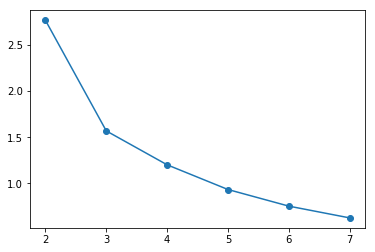

In [21]:
plt.plot(range(2,8),lst_in,marker='o')

In [22]:
cl = KMeans(n_clusters=4)

In [23]:
cl.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
df['cl'] = cl.predict(Xs)

In [25]:
df.groupby('cl').mean()

Edad    Estatura    #Zapato
cl                                  
0   21.307692  155.076923  23.038462
1   21.666667  170.777778  26.555556
2   22.666667  178.133333  28.433333
3   22.000000  160.916667  24.500000

In [26]:
pd.DataFrame(df.mean()).T

Edad   Estatura    #Zapato       cl
0  21.880597  167.61194  25.925373  1.38806

In [27]:
aux = df[['Sexo','cl']].copy()

In [28]:
aux['n']=1

In [29]:
aux.pivot_table(aggfunc='count',index='cl',columns='Sexo')

n      
Sexo     H     M
cl              
0      NaN  13.0
1     25.0   2.0
2     15.0   NaN
3      NaN  12.0

In [30]:
df['y'] = (df['Sexo']=='M').astype(int)

In [31]:
df.y.value_counts(normalize=True)

0    0.597015
1    0.402985
Name: y, dtype: float64

In [32]:
y = df['y'].copy()

In [33]:
lr = LogisticRegression()

In [44]:
Xt,Xv,yt,yv =train_test_split(X,y,train_size=0.7)

lr.fit(Xt,yt)

print "train %.3f"%accuracy_score(y_pred=lr.predict(Xt),y_true=yt)
print "validate %.3f"%accuracy_score(y_pred=lr.predict(Xv),y_true=yv)

train 0.804
validate 0.810


In [45]:
lr.predict(np.array([22,165,26]).reshape(1, -1))[0]

ValueError: X has 3 features per sample; expecting 2

In [77]:
lr.coef_

array([[ 0.51188346,  0.17266339, -1.60306799]])

In [78]:
lr.intercept_

array([0.58318041])

In [79]:
import pickle

In [80]:
pickle.dump(lr,open('modelo.modelito','wb'))

In [5]:
np.array([0])[0]

0

In [46]:
from sklearn.feature_selection import SelectKBest

In [53]:
sk = SelectKBest(k=1)

In [54]:
sk.fit(X,y)

SelectKBest(k=1, score_func=<function f_classif at 0x7fad5fae0a28>)

In [55]:
sk.get_support()

array([False, False,  True])